![](Logo3.png)

# Correlación 


## Tabla de Contenido

[1. Contexto de la práctica](#id1)<br>
[2. Evaluar dataset](#id2)<br>
[3. ¿Cómo elegir el método de visualización correcto?](#id3)<br>
[4. Exploración de variables continuas](#id4)<br>
.... [4.1 Diagrama de dispersión de "engine-size" y "precio"](#id41)  
........ [4.1.1 Usar gráficos bivariados](#id411)  
.... [4.2 Diagrama de dispersión de "city-mpg" y "precio"](#id42)  
.... [4.3 Diagrama de dispersión de "peak-rpm" y "precio"](#id43)    
[5. Gráficos de dispersión y variables correlacionables](#id5)<br>
.... [5.1. Diagrama de caja para ver la relacion de "body-style" y "precio"](#id51)<br>
.... [5.2. Diagrama de caja para ver la relacion de "engine-location" y "precio"](#id52)<br>
.... [5.3. Diagrama de caja para ver la relacion de "drive-wheels" y "precio"](#id53)<br>
[6. Análisis Estadístico Descriptivo](#id6)<br>
.... [6.1 Incluir tipos de datos object en describe](#id61)<br>
.... [6.2 Contar valores](#id62)<br>
.... [6.3 Agrupamiento y tablas dinámicas de valores](#id63)<br>
[7. Correlación](#id7)<br> 
.... [7.1. Calcular la correlación de Pearson y el valor P de ‘wheel-base’ y ‘price’.](#id71)<br> 
.... [7.2. Calcular la correlación de Pearson y el valor P de ‘Horsepower’ y ‘price’.](#id72)<br> 
.... [7.3. Calcular la correlación de Pearson y el valor P de ‘engine-size’ y ‘price’.](#id73)<br> 
.... [7.4. Calcular la correlación de Pearson y el valor P de ‘city-mpg’ y ‘price’.](#id74)<br> 


### Seaborn

**User guide and tutorial**  
https://seaborn.pydata.org/tutorial.html

**Gallery**  
https://seaborn.pydata.org/examples/index.html  

**Plotting with categorical data**  
https://seaborn.pydata.org/tutorial/categorical.html#categorical-scatterplots

## 1. Contexto de la práctica    <a id='id2'> </a>

- En esta sección usaremos distintos métodos para ver si ciertas caracteristicas (tamaño del motor, ubicacion, del motor, caballos de fuerza, el consumo de combustible, entre otras), pueden ser usadas para predecir el precio de un vehiculo.
- Para la evaluacion de las caracteristicas usaremos diferentes tipos de graficos para ver la fuerza de la relacion entre las diferentes variables, asi como la correlacion entre éstas.
- Se exponen diferentes formas de evaluar variables numéricas y categóricas. 

## 2. Evaluar Dataset   <a id='id2'> </a>

- En esta prcatica usaremos diferentes métodos para ver si ciertas caracteristicas pueden ser usadas para predecir el precio de un coche.
-  Usaremos el dataset de vehiculos (autos2) que se corrigió en la practica anterior ( correccion de valores nulos o faltantes, tipos de datos, etc)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
autos2 = pd.read_csv("autos2.csv")
autos2.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map,horsepower-binned
0,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,13495.0,11.190476,1,0,1,1,Low
1,3,122,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,5000.0,21,8.703704,16500.0,11.190476,1,0,1,1,Low
2,1,122,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,5000.0,19,9.038462,16500.0,12.368421,1,0,1,1,Medium
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,5500.0,24,7.833333,13950.0,9.791667,1,0,1,1,Low
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,5500.0,18,10.681818,17450.0,13.055556,1,0,1,1,Low


### 3. ¿Cómo elegir el método de visualización correcto?   <a id='id3'> </a>

- Al visualizar variables individuales, es importante **entender primero con qué tipo de variable estamos tratando. 
- Esto nos ayudará a encontrar el método de visualización correcto para esa variable**.

In [3]:
print(autos2.dtypes)

symboling              int64
normalized-losses      int64
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                 float64
stroke               float64
compression-ratio    float64
horsepower             int64
peak-rpm             float64
city-mpg               int64
highway-L/100km      float64
price                float64
city-L/100km         float64
fuel-type_code         int64
diesel                 int64
gas                    int64
fuel-type-map          int64
horsepower-binned     object
dtype: object


### Correlacion con el método Corr
Podemos calcular la correlación entre variables de tipo “int64” o “float64” utilizando el **método "corr"** del dataframe de la librería pandas.

In [4]:
# Como ya se vio anterirmente, la diagonal principal esta en 1s

autos2.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,0.196735,-0.196735,0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,0.101546,-0.101546,0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,-0.307237,0.307237,-0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,-0.211187,0.211187,-0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,-0.244356,0.244356,-0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,-0.281578,0.281578,-0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,-0.221046,0.221046,-0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,-0.070779,0.070779,-0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,-0.054458,0.054458,-0.054458,-0.054458
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,-0.241064,0.241064,-0.241064,-0.241064


### Correlación entre variables seleccionadas

Evaluar la correlación de las siguientes columnas: bore, stroke, compression-ratio , y horsepower.

In [5]:
autos2[['bore','stroke' ,'compression-ratio','horsepower']].corr()

,bore,stroke,compression-ratio,horsepower
bore,1.000000,-0.055390,0.001263,0.566903
stroke,-0.055390,1.000000,0.187871,0.098128
compression-ratio,0.001263,0.187871,1.000000,-0.214489
horsepower,0.566903,0.098128,-0.214489,1.000000


## 4. Exploración de variables continuas  <a id='id4'> </a>

- Las variables numéricas continuas son variables que pueden contener cualquier valor dentro de cierto rango. 
- Las variables numéricas continuas pueden tener el tipo “int64” o “float64”. 
- Una excelente **manera de visualizar estas variables es mediante el uso de diagramas de dispersión con líneas ajustadas**.

Para comenzar a comprender **la relación (lineal) entre una variable individual y el precio**, podemos usar **“regplot”, que traza el diagrama de dispersión**, además de, **la línea de regresión ajustada** para los datos.

### 4.1. Diagrama de dispersión de “tamaño del motor” y “precio”    <a id='id41'> </a>

<AxesSubplot:xlabel='engine-size', ylabel='price'>

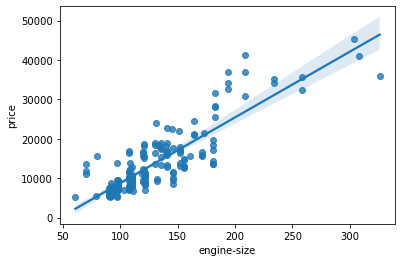

In [6]:
sns.regplot(x="engine-size", y="price", data=autos2)
#plt.ylim(0,)

#### Conclusión

- El resultado del diagrama de dispersion generado, permite darnos cuenta que **a medida que aumenta el tamaño del motor, aumenta el precio**: esto indica una **correlación directa positiva** entre estas dos variables. 
- El **tamaño del motor parece ser un buen predictor de precio,** ya que la línea de regresión es casi una línea diagonal perfecta.
- Con base en lo anterior, Podemos examinar la **correlación entre ‘tamaño del motor’ y ‘precio’** y ver que es **aproximadamente 0.87**

###  Analicemos la correlación

In [7]:
autos2 [["engine-size", "price"]].corr()

,engine-size,price
engine-size,1.000000,0.872335
price,0.872335,1.000000


<AxesSubplot:>

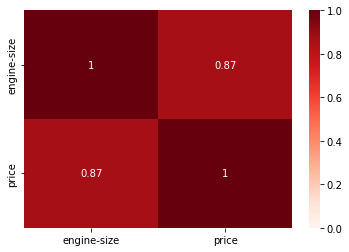

In [8]:
# Mapa de calor de la correlación

sns.heatmap(autos2 [["engine-size", "price"]].corr(), annot=True, cmap = "Reds", vmin=0, vmax=1 )

###  4.1.1 Usar gráficos bivariados  <a id='id411'> </a>

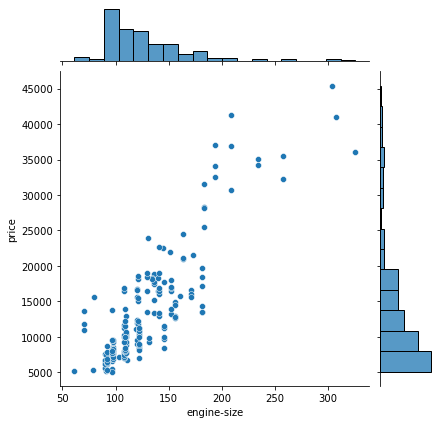

In [9]:
# JOINTPLOT
# gráfica de dos variables con gráficos bivariados y univariados.

# REFERENCIA
# https://seaborn.pydata.org/generated/seaborn.jointplot.html

sns.jointplot( x="engine-size", y="price", data = autos2)

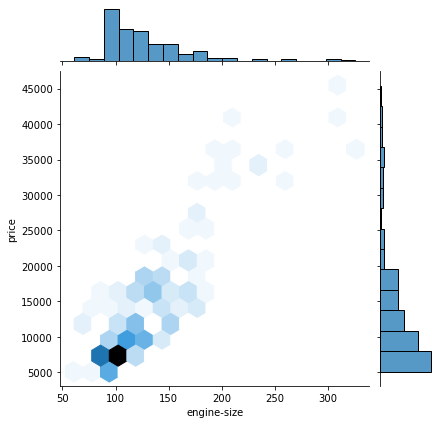

In [10]:
# KIND
# Cambiar Tipo de gráfico.

sns.jointplot(x="engine-size", y="price", data = autos2, kind = "hex")

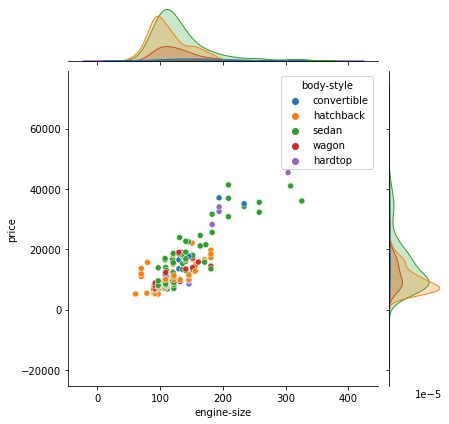

In [11]:
# Agregar una tercer variable para identificar el tipo de vehiculos

# HUE =  Variable semántica que se asigna para determinar el color de los elementos de la trama.

# REFERENCIA
# https://seaborn.pydata.org/generated/seaborn.jointplot.html

sns.jointplot( x="engine-size", y="price", hue = "body-style", data = autos2)

### 4.2. Diagrama de dispersión de “city-mpg” y “precio”   <a id='id42'> </a>

<AxesSubplot:xlabel='city-mpg', ylabel='price'>

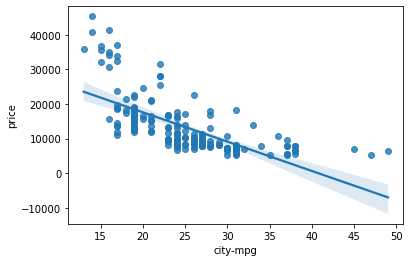

In [12]:
sns.regplot(x="city-mpg", y="price", data= autos2 )

#### Conclusión:

- A medida que aumenta city-mpg, el precio baja: esto indica un **relación negativa entre estas dos variables**. 
- city m.p.g. podría predecir el precio.
- Podemos examinar la correlación entre 'city-mpg' y 'price' y ver que es aproximandamente -0.686

In [13]:
autos2 [['city-mpg', 'price']].corr()

,city-mpg,price
city-mpg,1.000000,-0.686571
price,-0.686571,1.000000


### 4.3 Diagrama de dispersión de “peak-rpm” y “precio”  <a id='id43'> </a>

<AxesSubplot:xlabel='peak-rpm', ylabel='price'>

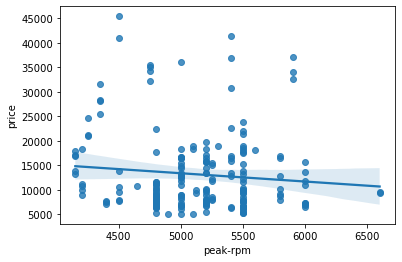

In [14]:
sns.regplot(x="peak-rpm", y="price", data = autos2 )

#### Conclusión

- Las **rpm máximas NO parecen ser un buen predictor del precio**, ya que la línea de regresión está cerca de la horizontal. 
- Además, los puntos de **datos están muy dispersos y lejos de la línea ajustada**, lo que muestra mucha variabilidad. 
- Por lo tanto, **no es una variable confiable**.  

- Igualmente, al **examinar la correlación entre ‘peak-rpm’ y ‘price’** se ve  que es aproximadamente -0.101616

In [15]:
autos2 [['peak-rpm','price']].corr()

,peak-rpm,price
peak-rpm,1.000000,-0.101616
price,-0.101616,1.000000


### Ejercicio

Que otra variable consideras puede ser una buena variable predictora en base a los conocimientos de los vehiculos en general

## 5. Exploracion de variables categóricas   <a id='id5'> </a>
  
<br>
  
- Este tipo de variables  **describen una ‘característica’** de una unidad de datos y se seleccionan de **un pequeño grupo de categorías**. 
- Las variables categóricas pueden tener el tipo “objeto” o “int64”. 
- Una buena forma de **visualizar variables categóricas** es mediante el uso de **diagramas de caja**.

Los diagramas de caja muestran la distribución de los datos

### 5.1. Diagrama de caja para ver la relacion de “body-style” y “precio”   <a id='id51'> </a>

- Vemos que las **distribuciones de precios** entre las diferentes tipos de vehiculos tienen una superposición entre los precios de los diferentes tipos, 
- La **superposición de precios es significativa**, es decir, no es posible identificar que rangos de precios pertenecen a un tipo de vehiculo, por lo tanto, **el tipo de vehiculo no sería un buen predictor del precio**.

<AxesSubplot:xlabel='body-style', ylabel='price'>

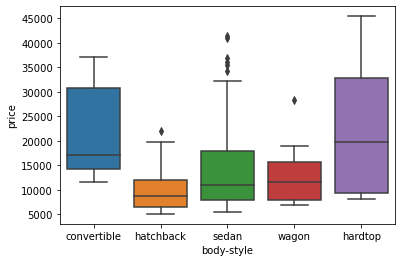

In [16]:
# Diagrama de cajas con Orientacion Vertical

sns.boxplot(x="body-style", y="price", data = autos2 ) 

<AxesSubplot:xlabel='price', ylabel='body-style'>

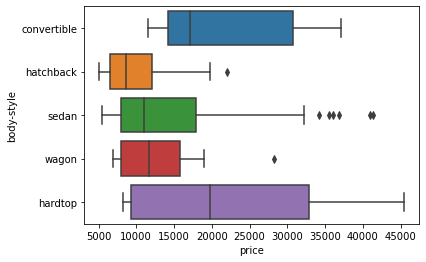

In [17]:
# Diagrama de cajas con Orientacion horizontal

# Definimos en el eje x una variable numerica
# Definimos en el eje y una variable categórica

sns.boxplot(x="price", y="body-style",   orient="h", data = autos2 ) 

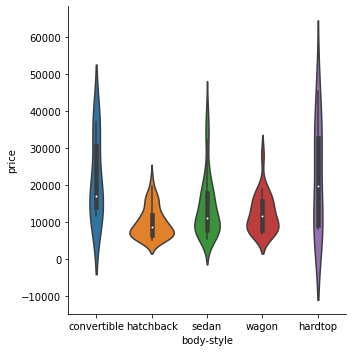

In [18]:
# DIAGRAMA DE VIOLIN
# Combina un diagrama de caja con la estimación de la densidad

sns.catplot(x="body-style", y="price",  kind="violin", data = autos2 )

### 5.2. Diagrama de caja para ver la relacion de “engine-location” y “precio”   <a id='id52'> </a>

- Vemos que el rango de los precios en los vehiculos que tienen el motor en la parte delantera, con respecto a los vehiculos que lo tienen en la parte trasera es lo suficientemente diferente como para identificar el precio de un vehiculo con estas caracteristicas.
- La ubicación del motor proporciona un buen indicador para ubicar el precio del vehiculo, por lo tanto, la **ubicación del motor es un buen predictor del precio**.

<AxesSubplot:xlabel='engine-location', ylabel='price'>

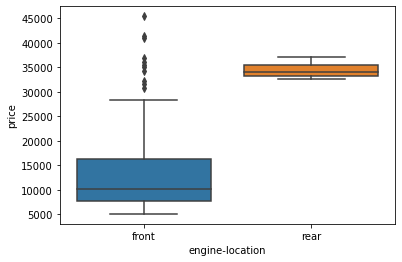

In [19]:
sns.boxplot(x="engine-location", y="price", data = autos2)

### 5.3. Diagrama de caja para ver la relacion de “drive-wheels” y “precio”  <a id='id53'> </a>

- Aquí observamos que **el rango de precios de una de las categorias (rwd) es diferente** con respecto a las otras 2 categorias, 
- Aunque en las otras 2 categorias el rango de precios es muy similar, puede ser suficiente para identificar el precio del vehiculo en base ala traccion en las ruedas (drive-wheels).
- drive-wheels podría **ser una variable medianamente regular como predictor del precio**

<AxesSubplot:xlabel='drive-wheels', ylabel='price'>

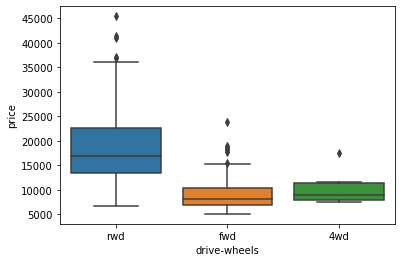

In [20]:
# drive-wheels
sns.boxplot(x="drive-wheels", y="price", data = autos2)

## 6. Análisis Estadístico Descriptivo  <a id='id6'> </a>

In [21]:
# Usamos el metodo describe para que me proporcione la estadistica descriptiva d elas variables
# continuas del dataframe

autos2.describe()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,...,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,0.837102,0.915126,0.899108,2555.666667,126.875622,3.330692,3.256874,...,103.402985,5117.665368,25.179104,8.044957,13207.129353,9.944145,0.900498,0.099502,0.900498,0.900498
std,1.254802,31.99625,6.066366,0.059213,0.029187,0.040933,517.296727,41.546834,0.268072,0.316048,...,37.365650,478.113805,6.423220,1.840739,7947.066342,2.534599,0.300083,0.300083,0.300083,0.300083
min,-2.000000,65.00000,86.600000,0.678039,0.837500,0.799331,1488.000000,61.000000,2.540000,2.070000,...,48.000000,4150.000000,13.000000,4.351852,5118.000000,4.795918,0.000000,0.000000,0.000000,0.000000
25%,0.000000,101.00000,94.500000,0.801538,0.890278,0.869565,2169.000000,98.000000,3.150000,3.110000,...,70.000000,4800.000000,19.000000,6.911765,7775.000000,7.833333,1.000000,0.000000,1.000000,1.000000
50%,1.000000,122.00000,97.000000,0.832292,0.909722,0.904682,2414.000000,120.000000,3.310000,3.290000,...,95.000000,5125.369458,24.000000,7.833333,10295.000000,9.791667,1.000000,0.000000,1.000000,1.000000
75%,2.000000,137.00000,102.400000,0.881788,0.925000,0.928094,2926.000000,141.000000,3.580000,3.410000,...,116.000000,5500.000000,30.000000,9.400000,16500.000000,12.368421,1.000000,0.000000,1.000000,1.000000
max,3.000000,256.00000,120.900000,1.000000,1.000000,1.000000,4066.000000,326.000000,3.940000,4.170000,...,262.000000,6600.000000,49.000000,14.687500,45400.000000,18.076923,1.000000,1.000000,1.000000,1.000000


### 6.1. Incluir tipos de datos object en describe   <a id='id61'> </a>

- La configuración predeterminada del **método describe** omite las variables de tipo object. 
- Podemos indicarle al método "describe" que analice las variables de tipo ‘objeto’ de la siguiente manera:

In [22]:
autos2.describe(include=['object'])

,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,engine-type,num-of-cylinders,fuel-system,horsepower-binned
count,201,201,201,201,201,201,201,201,201,201,201
unique,22,2,2,2,5,3,2,6,7,8,3
top,toyota,gas,std,four,sedan,fwd,front,ohc,four,mpfi,Low
freq,32,181,165,115,94,118,198,145,157,92,153


### 6.2 Contar valores   <a id='id62'> </a>

- El conteo de valores es una buena forma de **entender cuántas unidades de cada característica / variable tenemos**. 
- Podemos aplicar el método **value_counts** en la columna *drive-wheels*. 
- No olvidar que el método “value_counts” solo funciona en series de Pandas, no en Pandas Dataframes.
- Debido a lo dicho anteriormente, solo incluimos un corchete **df ['drive-wheels']**, y no dos corchetes **df [['drive-wheels']]**

In [23]:
# EL resultado de value_counts es una serie, la convertimos a dataframe para
# mejor visualizacion y uso posterior

autos2['drive-wheels'].value_counts()

fwd    118
rwd     75
4wd      8
Name: drive-wheels, dtype: int64

In [33]:
drive_wheels_counts = autos2['drive-wheels'].value_counts().to_frame()
drive_wheels_counts.rename(columns={'drive-wheels': 'value_counts'}, inplace=True)
drive_wheels_counts.index.name = 'drive-wheels'
drive_wheels_counts.head()

,value_counts
drive-wheels,
fwd,118
rwd,75
4wd,8


 #### Repetimos el proceso para la ubicacion del motor:
 
 - Al hacerlo, vemos que solo tenemos tres autos con motor trasero y 198 con motor delantero lo que nos da un sesgo de la informacion
 - Debido al sesgo de los datos determinamos que la ubicacion del motor no es una buena variable predictora
 

In [34]:
engine_loc_counts = autos2['engine-location'].value_counts().to_frame()
engine_loc_counts.rename(columns={'engine-location': 'value_counts'}, inplace=True)
engine_loc_counts.index.name = 'engine-location'
engine_loc_counts.head()

,value_counts
engine-location,
front,198
rear,3


### 6.3 Agrupamiento y tablas dinámicas de valores   <a id='id63'> </a>

- El método **groupby** agrupa los datos por diferentes categorías. 
- Los datos se **agrupan en función de una o diversas variables** y la estadística (mean, count, max, min, etc) se realiza en los grupos individuales.
- Los datos agrupados son mucho más fáciles de visualizar cuando se convierten en una tabla dinámica.
-  Una tabla dinámica es como una hoja de cálculo de Excel, con una variable a lo largo de la columna y otra a lo largo de la fila
-  Podemos **convertir** el marco de datos en una **tabla dinámica** utilizando el método **pivot** para crear una tabla dinámica a partir de los grupos

In [40]:
# Agrupar los datos por tipo de traccion en ruedas y calcular el precio promedio de cada grupo

df_group_1 = autos2[['drive-wheels','price']].groupby(['drive-wheels'],as_index=False).mean()
df_group_1

,drive-wheels,price
0,4wd,10241.000000
1,fwd,9244.779661
2,rwd,19757.613333


#### Conclusión

- A partir del resultado anterior, nos damos cuenta que los vehículos con tracción trasera son, en promedio, los más caros
- mientras que los vehiculos con traccion en las 4 ruedas, y los vehiculos con traccion enlas ruedas delanteras tienen aproximadamente el mismo precio.

In [41]:
# Agrupar los datos por tipo de vehiculo y calcular el precio promedio de cada grupo

df_group_2 = autos2[['body-style','price']].groupby(['body-style'],as_index=False).mean()
df_group_2

,body-style,price
0,convertible,21890.500000
1,hardtop,22208.500000
2,hatchback,9957.441176
3,sedan,14459.755319
4,wagon,12371.960000


#### Conclusion

- A partir del resultado anterior, nos damos cuenta que los vehículos hardtop y convertibles, en promedio, son los más caros
- mientras que los hatchback  son los más económicos.

#### Agrupamientos por mas de 1 columna

- También es posible agrupar con múltiples variables. 
- Por ejemplo, agrupemos por ‘drive-wheels’ y ‘body-style’. 
- Esto agrupa el marco de datos por las combinaciones únicas ‘drive-wheels’ y ‘body-style’. 
- Podemos almacenar los resultados en la variable ‘grouped_test1’.

In [42]:
df_gptest = autos2 [['drive-wheels','body-style','price']]
grouped_test1 = df_gptest.groupby(['drive-wheels','body-style'],as_index=False).mean()
grouped_test1

,drive-wheels,body-style,price
0,4wd,hatchback,7603.000000
1,4wd,sedan,12647.333333
2,4wd,wagon,9095.750000
3,fwd,convertible,11595.000000
4,fwd,hardtop,8249.000000
5,fwd,hatchback,8396.387755
6,fwd,sedan,9811.800000
7,fwd,wagon,9997.333333
8,rwd,convertible,23949.600000
9,rwd,hardtop,24202.714286


#### Estos datos agrupados son mucho más fáciles de visualizar cuando se convierten en una tabla dinámica.

In [43]:
grouped_pivot = grouped_test1.pivot(index='drive-wheels',columns='body-style')
grouped_pivot

price                                            \
body-style   convertible       hardtop     hatchback         sedan   
drive-wheels                                                         
4wd                  NaN           NaN   7603.000000  12647.333333   
fwd              11595.0   8249.000000   8396.387755   9811.800000   
rwd              23949.6  24202.714286  14337.777778  21711.833333   

                            
body-style           wagon  
drive-wheels                
4wd            9095.750000  
fwd            9997.333333  
rwd           16994.222222

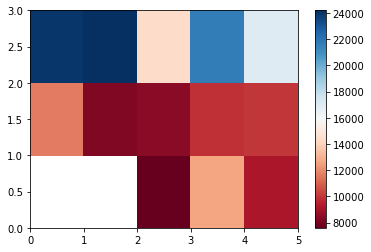

In [46]:
# Mapa de calor del dataframe anterior

plt.pcolor(grouped_pivot, cmap='RdBu')
plt.colorbar()
plt.show()

#### Personalizacion del mapa de calor

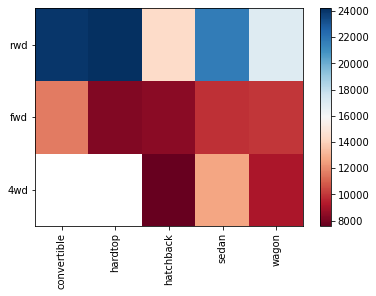

In [47]:
fig, ax = plt.subplots()
im = ax.pcolor(grouped_pivot, cmap='RdBu')

# nombres de las etiquetas 
row_labels = grouped_pivot.columns.levels[1]
col_labels = grouped_pivot.index

# mover etiquetas al centro 
ax.set_xticks(np.arange(grouped_pivot.shape[1]) + 0.5, minor=False)
ax.set_yticks(np.arange(grouped_pivot.shape[0]) + 0.5, minor=False)

# insertar etiquetas 
ax.set_xticklabels(row_labels, minor=False)
ax.set_yticklabels(col_labels, minor=False)

#rotar las etiquetas si son muy largas 
plt.xticks(rotation=90)

fig.colorbar(im)
plt.show()

#### Análisis del mapa de calor

- ¿Cuáles son las características principales que tienen el mayor impacto en el precio del automóvil?”.
- Para obtener una mejor medición de las características importantes, observamos la correlación de estas variables con el precio del automóvil

## 7. Correlación   <a id='id7'> </a>

**Correlación**: una medida del grado de interdependencia entre variables.  

**Causalidad**: la relación entre causa y efecto entre dos variables.  

- Es importante saber la diferencia entre estos dos y que la correlación no implica causalidad. 
- Determinar la correlación es mucho más simple que la causalidad determinante ya que la causalidad puede requerir experimentación independiente.  


**Correlación de Pearson**

- La correlación de Pearson mide la dependencia lineal entre dos variables X e Y.
- El coeficiente resultante es un valor entre -1 y 1 inclusive, donde:
    - 1: correlación lineal positiva total.
    - 0: Sin correlación lineal, las dos variables probablemente no se afectan entre sí.
    - -1: correlación lineal negativa total.

In [48]:
autos2.corr()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,horsepower,peak-rpm,city-mpg,highway-L/100km,price,city-L/100km,fuel-type_code,diesel,gas,fuel-type-map
symboling,1.000000,0.466264,-0.535987,-0.365404,-0.242423,-0.550160,-0.233118,-0.110581,-0.140019,-0.008153,...,0.075810,0.279740,-0.035527,-0.029807,-0.082391,0.066171,0.196735,-0.196735,0.196735,0.196735
normalized-losses,0.466264,1.000000,-0.056661,0.019424,0.086802,-0.373737,0.099404,0.112360,-0.029862,0.055045,...,0.217300,0.239543,-0.225016,0.181189,0.133999,0.238567,0.101546,-0.101546,0.101546,0.101546
wheel-base,-0.535987,-0.056661,1.000000,0.876024,0.814507,0.590742,0.782097,0.572027,0.493244,0.158018,...,0.371178,-0.360305,-0.470606,0.577576,0.584642,0.476153,-0.307237,0.307237,-0.307237,-0.307237
length,-0.365404,0.019424,0.876024,1.000000,0.857170,0.492063,0.880665,0.685025,0.608971,0.123952,...,0.579795,-0.285970,-0.665192,0.707108,0.690628,0.657373,-0.211187,0.211187,-0.211187,-0.211187
width,-0.242423,0.086802,0.814507,0.857170,1.000000,0.306002,0.866201,0.729436,0.544885,0.188822,...,0.615056,-0.245800,-0.633531,0.736728,0.751265,0.673363,-0.244356,0.244356,-0.244356,-0.244356
height,-0.550160,-0.373737,0.590742,0.492063,0.306002,1.000000,0.307581,0.074694,0.180449,-0.060663,...,-0.087001,-0.309974,-0.049800,0.084301,0.135486,0.003811,-0.281578,0.281578,-0.281578,-0.281578
curb-weight,-0.233118,0.099404,0.782097,0.880665,0.866201,0.307581,1.000000,0.849072,0.644060,0.167438,...,0.757981,-0.279361,-0.749543,0.836921,0.834415,0.785353,-0.221046,0.221046,-0.221046,-0.221046
engine-size,-0.110581,0.112360,0.572027,0.685025,0.729436,0.074694,0.849072,1.000000,0.572609,0.205928,...,0.822668,-0.256733,-0.650546,0.783465,0.872335,0.745059,-0.070779,0.070779,-0.070779,-0.070779
bore,-0.140019,-0.029862,0.493244,0.608971,0.544885,0.180449,0.644060,0.572609,1.000000,-0.055390,...,0.566903,-0.267392,-0.582027,0.559112,0.543155,0.554610,-0.054458,0.054458,-0.054458,-0.054458
stroke,-0.008153,0.055045,0.158018,0.123952,0.188822,-0.060663,0.167438,0.205928,-0.055390,1.000000,...,0.098128,-0.063561,-0.033956,0.047089,0.082269,0.036133,-0.241064,0.241064,-0.241064,-0.241064


**Valor p**:

¿Qué es este valor P?   

    El valor P es el **valor de probabilidad de que la correlación entre estas dos variables sea estadísticamente significativa**. 
    Normalmente, elegimos un nivel de significancia de 0.05, lo que significa que estamos 95% seguros de que la correlación entre las variables es significativa.

Por convención, cuando el

- El valor **p es $<$ 0.001:** decimos que hay pruebas sólidas de que la correlación es significativa.</li>
- el valor **p es $<$0.05:** existe evidencia moderada de que la correlación es significativa.
- el valor **p es $<$0.1:** existe evidencia débil de que la correlación es significativa.
- el valor **p es $>$ 0.1:** no hay evidencia de que la correlación sea significativa.


Podemos obtener esta información usando el módulo **stats** de la biblioteca **scipy**.


In [49]:
from scipy import stats

###  7.1. Calcular el coeficiente de correlación de Pearson y el valor P de ‘wheel-base’ y ‘price’.  <a id='id71'> </a>

In [52]:
pearson_coef, p_value = stats.pearsonr( autos2['wheel-base'], autos2['price'] )

print("El Coeficiente de Correlación de Pearson es", pearson_coef, " Con un valor P de =", p_value)  

El Coeficiente de Correlación de Pearson es 0.5846418222655081  Con un valor P de = 8.076488270732989e-20


#### Conclusión

Dado que el valor **p es  < 0.001**, la correlación entre la distancia entre wheel-base y price **es estadísticamente significativa**, aunque **la relación lineal no es extremadamente fuerte** (~ 0.585).

###  7.2. Calcular el coeficiente de correlación de Pearson y el valor P de ‘Horsepower’ y ‘price’.  <a id='id72'> </a>

In [54]:
pearson_coef, p_value = stats.pearsonr( autos2['horsepower'], autos2['price'])

print("El Coeficiente de Correlación de Pearson es", pearson_coef, " Con un valor P de =", p_value)

El Coeficiente de Correlación de Pearson es 0.8096068016571054  Con un valor P de = 6.273536270650504e-48


#### Conclusión

Dado que el valor p es  < 0.001, la correlación entre los caballos de fuerza y el precio es **estadísticamente significativa**, y **la relación lineal es fuerte** (~ 0.809, cercana a 1).

###  7.3. Calcular el coeficiente de correlación de Pearson y el valor P de ‘engine-size’ y ‘price’.  <a id='id73'> </a>

In [57]:
pearson_coef, p_value = stats.pearsonr( autos2 ['engine-size'], autos2['price'])

print("El Coeficiente de Correlación de Pearson es", pearson_coef, "  Con un valor P de = ", p_value)  

El Coeficiente de Correlación de Pearson es 0.8723351674455185   Con un valor P de =  9.265491622198389e-64


#### Conclusión

Dado que el valor p es  < 0.001, la correlación entre la longitud y el precio es estadísticamente significativa, y **la relación lineal es moderadamente fuerte** (~ 0.691).

###  7.4. Calcular el coeficiente de correlación de Pearson y el valor P de ‘city-mpg’ y ‘price’.  <a id='id74'> </a>

In [58]:
pearson_coef, p_value = stats.pearsonr( autos2['city-mpg'], autos2['price'])
print("El Coeficiente de Correlación de Pearson es", pearson_coef, "  Con un valor P de = ", p_value ) 

El Coeficiente de Correlación de Pearson es -0.6865710067844677   Con un valor P de =  2.321132065567674e-29
